In [1]:
%pip install pandas openpyxl


In [2]:
import pandas as pd


In [63]:
import numpy as np

In [66]:
!pip install matplotlib

<class 'OSError'>: Not available

In [3]:
df_hogares = pd.read_excel("EDM2018HOGARES (1).xlsx")  
df_individuos = pd.read_excel("EDM2018INDIVIDUOS (1).xlsx")
df_VIAJES= pd.read_excel("EDM2018VIAJES.xlsx")

In [4]:
df_hogares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58492 entries, 0 to 58491
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_HOGAR              58492 non-null  int64  
 1   CODMUNI               58492 non-null  int64  
 2   NOMMUNI               58492 non-null  object 
 3   CODPROV               58492 non-null  int64  
 4   NOMPROV               58492 non-null  object 
 5   ZT1259                58492 non-null  object 
 6   CZ208                 58492 non-null  int64  
 7   ELE_HOGAR_NUEVO       58492 non-null  float64
 8   TIPO_ENCUESTA         58492 non-null  object 
 9   A1PER                 58492 non-null  int64  
 10  A2PER4                58492 non-null  int64  
 11  B1NVE                 58492 non-null  int64  
 12  V1B11TIPO             48629 non-null  float64
 13  V1B12CARB             48629 non-null  float64
 14  V1B13EST              48629 non-null  float64
 15  V2B11TIPO1         

In [5]:
df_VIAJES.rename(columns={"ID_HOGAR": "hh_id", "ID_IND": "ind_id", "ID_VIAJE": "trip_id"}, inplace=True)
df_hogares.rename(columns={"ID_HOGAR": "hh_id"}, inplace=True)
df_individuos.rename(columns={"ID_HOGAR": "hh_id", "ID_IND": "ind_id"}, inplace=True)


In [7]:
df_individuos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85064 entries, 0 to 85063
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hh_id          85064 non-null  int64  
 1   ind_id         85064 non-null  int64  
 2   C2SEXO         85064 non-null  int64  
 3   EDAD_FIN       85064 non-null  int64  
 4   ELE_G_POND     85064 non-null  float64
 5   C4NAC          85064 non-null  int64  
 6   C5CAM          85064 non-null  int64  
 7   C6CARNE        85064 non-null  int64  
 8   C7ESTUD        85064 non-null  int64  
 9   C8ACTIV        85064 non-null  int64  
 10  C9PROF         37944 non-null  float64
 11  C10SECTOR      37944 non-null  float64
 12  C13TARJETA     85064 non-null  int64  
 13  C14ABONO       37316 non-null  float64
 14  DDIA           85064 non-null  int64  
 15  DMES           85064 non-null  int64  
 16  DANNO          85064 non-null  int64  
 17  DIASEM         85064 non-null  int64  
 18  DNOVIA

In [9]:
merged_df = df_VIAJES.merge(df_individuos, on=["hh_id", "ind_id"], how="inner")
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 40 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hh_id               222744 non-null  int64  
 1   ind_id              222744 non-null  int64  
 2   trip_id             222744 non-null  int64  
 3   VORI                222744 non-null  int64  
 4   VORIHORAINI         222744 non-null  int64  
 5   VDES                222744 non-null  int64  
 6   VDESHORAFIN         222744 non-null  int64  
 7   VFRECUENCIA         222744 non-null  int64  
 8   VVEHICULO           222741 non-null  float64
 9   VNOPRIVADO          105803 non-null  float64
 10  VNOPUBLICO          167688 non-null  float64
 11  VORIZT1259          222744 non-null  object 
 12  VDESZT1259          222744 non-null  object 
 13  TIPO_ENCUESTA_x     222744 non-null  object 
 14  N_ETAPAS_POR_VIAJE  222744 non-null  int64  
 15  MOTIVO_PRIORITARIO  222744 non-nul

,hh_id,ind_id,trip_id,VORI,VORIHORAINI,VDES,VDESHORAFIN,VFRECUENCIA,VVEHICULO,VNOPRIVADO,...,C14ABONO,DDIA,DMES,DANNO,DIASEM,DNOVIAJO,C11ZT1259,C12ZT1259,CPMR,TIPO_ENCUESTA_y
0,189,1,1,1,800,2,830,1,1.0,NaN,...,NaN,25,4,2018,3,NaN,104-001B,NaN,2,CAPI
1,189,1,2,2,1800,1,1830,1,1.0,NaN,...,NaN,25,4,2018,3,NaN,104-001B,NaN,2,CAPI
2,244,1,1,1,800,2,820,1,1.0,NaN,...,NaN,26,4,2018,4,NaN,104-001B,NaN,2,CAPI
3,244,1,2,2,1800,1,1820,1,1.0,NaN,...,NaN,26,4,2018,4,NaN,104-001B,NaN,2,CAPI
4,244,2,1,1,1113,5,1115,1,2.0,6.0,...,2.0,26,4,2018,4,NaN,NaN,NaN,2,CAPI


In [10]:
merged_df_final = merged_df.merge(df_hogares, on="hh_id", how="inner")
merged_df_final.info()
merged_df_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 68 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   hh_id                 222744 non-null  int64  
 1   ind_id                222744 non-null  int64  
 2   trip_id               222744 non-null  int64  
 3   VORI                  222744 non-null  int64  
 4   VORIHORAINI           222744 non-null  int64  
 5   VDES                  222744 non-null  int64  
 6   VDESHORAFIN           222744 non-null  int64  
 7   VFRECUENCIA           222744 non-null  int64  
 8   VVEHICULO             222741 non-null  float64
 9   VNOPRIVADO            105803 non-null  float64
 10  VNOPUBLICO            167688 non-null  float64
 11  VORIZT1259            222744 non-null  object 
 12  VDESZT1259            222744 non-null  object 
 13  TIPO_ENCUESTA_x       222744 non-null  object 
 14  N_ETAPAS_POR_VIAJE    222744 non-null  int64  
 15  

,hh_id,ind_id,trip_id,VORI,VORIHORAINI,VDES,VDESHORAFIN,VFRECUENCIA,VVEHICULO,VNOPRIVADO,...,V3B12CARB1,V3B13EST1,V4B11TIPO1,V4B12CARB1,V4B13EST1,V5B11TIPO1,V5B12CARB1,V5B13EST1,N_MIEMBROS_POR_HOGAR,N_VIAJES_POR_HOGAR
0,189,1,1,1,800,2,830,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
1,189,1,2,2,1800,1,1830,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
2,244,1,1,1,800,2,820,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4
3,244,1,2,2,1800,1,1820,1,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4
4,244,2,1,1,1113,5,1115,1,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4


In [17]:
merged_df_final.columns

Index(['hh_id', 'ind_id', 'trip_id', 'origin', 'start_time', 'destination',
       'arrival_time', 'travel_freq', 'pv_for_trip?', 'why_not_pv',
       'why_not_public_t', 'VORIZT1259', 'VDESZT1259', 'TIPO_ENCUESTA_x',
       'n_stages_per_trip', 'primary_reason', 'distance_km',
       'MODO_PRIORITARIO', 'ELE_G_POND_ESC2', 'sex', 'Age', 'ELE_G_POND',
       'C4NAC', 'C5CAM', 'C6CARNE', 'C7ESTUD', 'C8ACTIV', 'C9PROF',
       'C10SECTOR', 'C13TARJETA', 'C14ABONO', 'Reference Day',
       'Reference Month', 'Reference Year', 'DIASEM', 'DNOVIAJO', 'C11ZT1259',
       'C12ZT1259', 'CPMR', 'TIPO_ENCUESTA_y', 'CODMUNI', 'NOMMUNI', 'CODPROV',
       'NOMPROV', 'ZT1259', 'CZ208', 'ELE_HOGAR_NUEVO', 'TIPO_ENCUESTA',
       'A1PER', 'A2PER4', 'B1NVE', 'V1B11TIPO', 'V1B12CARB', 'V1B13EST',
       'V2B11TIPO1', 'V2B12CARB1', 'V2B13EST1', 'V3B11TIPO1', 'V3B12CARB1',
       'V3B13EST1', 'V4B11TIPO1', 'V4B12CARB1', 'V4B13EST1', 'V5B11TIPO1',
       'V5B12CARB1', 'V5B13EST1', 'N_MIEMBROS_POR_HOGAR',
  

In [13]:
merged_df_final.rename(columns={"DDIA": "Reference Day", "DMES": "Reference Month", "DANNO": "Reference Year", "C2SEXO": "sex", "EDAD_FIN": "Age"}, inplace=True)


In [14]:
merged_df_final.rename(columns={"VORI": "origin","VDES": "destination", "VFRECUENCIA": "travel_freq", "VVEHICULO": "pv_for_trip?", "VNOPRIVADO": "why_not_pv", "VNOPUBLICO": "why_not_public_t"}, inplace=True)


In [15]:
merged_df_final.rename(columns={"MOTIVO_PRIORITARIO": "primary_reason","DISTANCIA_VIAJE": "distance_km", "MODO_PRIORITARIO_y": "primary_mode"}, inplace=True)



In [16]:
merged_df_final.rename(columns={"VORIHORAINI": "start_time","VDESHORAFIN": "arrival_time", "N_ETAPAS_POR_VIAJE": "n_stages_per_trip"}, inplace=True)


In [25]:
merged_df_final.drop(columns={"VORIZT1259", "VDESZT1259", "TIPO_ENCUESTA_x"}, inplace=True)
 

<class 'KeyError'>: "['TIPO_ENCUESTA_x', 'VDESZT1259', 'VORIZT1259'] not found in axis"

In [26]:
merged_df_final.drop(columns={"ELE_G_POND_ESC2"}, inplace=True)


In [28]:
merged_df_final.rename(columns={"MODO_PRIORITARIO": "primary_mode","C4NAC": "spanish", "C5CAM": "madrid_community", "C6CARNE": "driving_license", "C7ESTUD": "educ", "C8ACTIV": "main_activity", "C9PROF": "prof_status", "C13TARJETA": "transport_card", "C14ABONO": "loaded?", "CPMR": "mobility_issue"},inplace=True)


In [30]:
merged_df_final.drop(columns={"ELE_G_POND","C10SECTOR", "DIASEM", "DNOVIAJO", "C11ZT1259", "C12ZT1259", "TIPO_ENCUESTA_y" }, inplace=True)


In [32]:
merged_df_final.rename(columns={"CODMUNI": "municip_code","NOMMUNI": "municip_name", "CODPROV": "province_code", "NOMPROV": "province_name", "A1PER": "ppl_hh", "A2PER4": "pp_4age_hh", "B1NVE": "vehicles_hh", "N_MIEMBROS_POR_HOGAR": "memebers_hh", "N_VIAJES_POR_HOGAR": "trips_hh"}, inplace=True)

In [34]:
merged_df_final.drop(columns={"ZT1259", "CZ208", "ELE_HOGAR_NUEVO", "TIPO_ENCUESTA"}, inplace=True)


In [35]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hh_id              222744 non-null  int64  
 1   ind_id             222744 non-null  int64  
 2   trip_id            222744 non-null  int64  
 3   origin             222744 non-null  int64  
 4   start_time         222744 non-null  int64  
 5   destination        222744 non-null  int64  
 6   arrival_time       222744 non-null  int64  
 7   travel_freq        222744 non-null  int64  
 8   pv_for_trip?       222741 non-null  float64
 9   why_not_pv         105803 non-null  float64
 10  why_not_public_t   167688 non-null  float64
 11  n_stages_per_trip  222744 non-null  int64  
 12  primary_reason     222744 non-null  int64  
 13  distance_km        222744 non-null  float64
 14  primary_mode       222744 non-null  int64  
 15  sex                222744 non-null  int64  
 16  Ag

In [67]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


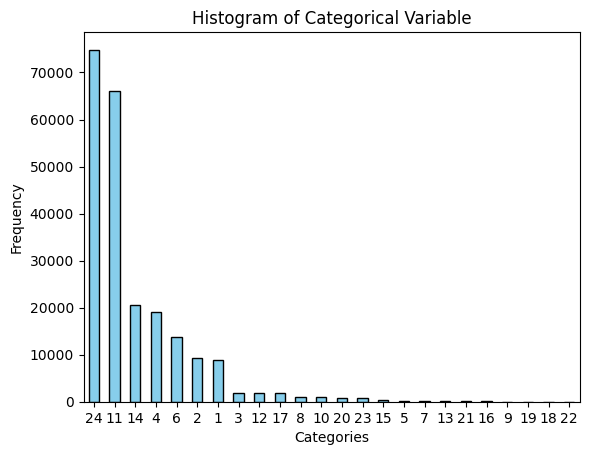

In [67]:
# Plot histogram (bar chart) for categorical data
merged_df_final["MODO_PRIORITARIO"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")

# Labels
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Histogram of Categorical Variable")
plt.xticks(rotation=0)  # Keep category labels horizontal

# Show plot
plt.show()

In [ ]:
# Plot histogram (bar chart) for categorical data
merged_df_final["C6CARNE"].value_counts().plot(kind="bar", color="skyblue", edgecolor="black")

# Labels
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Histogram of Categorical Variable")
plt.xticks(rotation=0)  # Keep category labels horizontal

# Show plot
plt.show()

In [36]:
# Save to CSV
file_path = "final_df.csv"  # Change filename as needed
merged_df_final.to_csv(file_path, index=False)

In [39]:
individual_cols = [
    "hh_id", "ind_id", "sex", "Age", "spanish", "madrid_community", "driving_license", 
    "educ", "main_activity", "prof_status", "transport_card", "loaded?", 
    "Reference Day", "Reference Month", "Reference Year", "mobility_issue"
]


In [40]:
household_cols = [
    "hh_id", "municip_code", "municip_name", "province_code", "province_name",
    "ppl_hh", "pp_4age_hh", "vehicles_hh",
    "V1B11TIPO", "V1B12CARB", "V1B13EST",
    "V2B11TIPO1", "V2B12CARB1", "V2B13EST1",
    "V3B11TIPO1", "V3B12CARB1", "V3B13EST1",
    "V4B11TIPO1", "V4B12CARB1", "V4B13EST1",
    "V5B11TIPO1", "V5B12CARB1", "V5B13EST1",
    "memebers_hh", "trips_hh"
]

In [41]:
trip_cols = [
    "hh_id", "ind_id", "trip_id", "origin", "start_time",
    "destination", "arrival_time", "travel_freq",
    "pv_for_trip?", "why_not_pv", "why_not_public_t",
    "n_stages_per_trip", "primary_reason", "distance_km", "primary_mode"
]

In [42]:
#### creating dataset for clustering 

In [55]:
cluster_df = df_individuos.merge(df_hogares, on="hh_id", how="inner")


In [45]:
# Save to CSV
file_path = "cluster_df1.csv"  # Change filename as needed
cluster_df.to_csv(file_path, index=False)

In [47]:
cluster_df.rename(columns={
"C2SEXO": "sex",
"EDAD_FIN": "Age",
"ELE_G_POND": "elevator_weight",
"C4NAC": "spanish",
"C5CAM": "madrid_community",
"C6CARNE": "driving_license",
"C7ESTUD": "educ",
"C8ACTIV": "main_activity",
"C9PROF": "prof_status",
"C10SECTOR": "sector",
"C13TARJETA": "transport_card",
"C14ABONO": "loaded?",
"DDIA": "Reference Day",
"DMES": "Reference Month",
"DANNO": "Reference Year",
"DIASEM": "day_of_week",
"DNOVIAJO": "no_travel_reason",
"C11ZT1259": "work_zone",
"C12ZT1259": "study_zone",
"CPMR": "mobility_issue",
"TIPO_ENCUESTA_x": "survey_type_x",
"CODMUNI": "municip_code",
"NOMMUNI": "municip_name",
"CODPROV": "province_code",
"NOMPROV": "province_name",
"ZT1259": "zone_1259",
"CZ208": "zone_208",
"ELE_HOGAR_NUEVO": "household_elevator",
"TIPO_ENCUESTA_y": "survey_type_y",
"A1PER": "ppl_hh",
"A2PER4": "pp_4age_hh",
"B1NVE": "vehicles_hh",
"V1B11TIPO": "veh1_type",
"V1B12CARB": "veh1_fuel",
"V1B13EST": "veh1_parking",
"V2B11TIPO1": "veh2_type",
"V2B12CARB1": "veh2_fuel",
"V2B13EST1": "veh2_parking",
"V3B11TIPO1": "veh3_type",
"V3B12CARB1": "veh3_fuel",
"V3B13EST1": "veh3_parking",
"V4B11TIPO1": "veh4_type",
"V4B12CARB1": "veh4_fuel",
"V4B13EST1": "veh4_parking",
"V5B11TIPO1": "veh5_type",
"V5B12CARB1": "veh5_fuel",
"V5B13EST1": "veh5_parking",
"N_MIEMBROS_POR_HOGAR": "memebers_hh",
"N_VIAJES_POR_HOGAR": "trips_hh"
}, inplace=True)

In [52]:
# Keep only the specified columns
cluster_df_final = cluster_df[[
    "hh_id", "ind_id", "sex", "Age", "spanish", "madrid_community", "driving_license",
    "educ", "main_activity", "prof_status", "sector", "transport_card", "loaded?",
    "Reference Day", "Reference Month", "Reference Year", "mobility_issue", "municip_code", "municip_name",
    "province_code", "province_name",
    "ppl_hh", "pp_4age_hh", "vehicles_hh", "veh1_type", "veh1_fuel", "veh1_parking",
    "veh2_type", "veh2_fuel", "veh2_parking", "veh3_type", "veh3_fuel", "veh3_parking",
    "veh4_type", "veh4_fuel", "veh4_parking", "veh5_type", "veh5_fuel", "veh5_parking",
    "memebers_hh", "trips_hh"
]]

In [53]:
cluster_df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85064 entries, 0 to 85063
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hh_id             85064 non-null  int64  
 1   ind_id            85064 non-null  int64  
 2   sex               85064 non-null  int64  
 3   Age               85064 non-null  int64  
 4   spanish           85064 non-null  int64  
 5   madrid_community  85064 non-null  int64  
 6   driving_license   85064 non-null  int64  
 7   educ              85064 non-null  int64  
 8   main_activity     85064 non-null  int64  
 9   prof_status       37944 non-null  float64
 10  sector            37944 non-null  float64
 11  transport_card    85064 non-null  int64  
 12  loaded?           37316 non-null  float64
 13  Reference Day     85064 non-null  int64  
 14  Reference Month   85064 non-null  int64  
 15  Reference Year    85064 non-null  int64  
 16  mobility_issue    85064 non-null  int64 

In [56]:
cluster_df_final.tail()

,hh_id,ind_id,sex,Age,spanish,madrid_community,driving_license,educ,main_activity,prof_status,...,veh3_fuel,veh3_parking,veh4_type,veh4_fuel,veh4_parking,veh5_type,veh5_fuel,veh5_parking,memebers_hh,trips_hh
85059,6011027,1,2,55,1,1,4,7,1,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
85060,6011053,1,1,49,1,1,5,7,1,2.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2,6
85061,6011053,2,1,6,1,1,1,1,6,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2,6
85062,6011059,1,1,14,1,1,1,2,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2
85063,6011137,1,1,38,1,1,5,7,1,3.0,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,1,7


In [70]:
# Define the conditions
conditions = [
    merged_df_final["primary_mode"].isin([24]),      # walking = 1
    merged_df_final["primary_mode"].isin([11, 14, 12, 15, 13, 16]),     # car passenger or driver = 2
    merged_df_final["primary_mode"].isin([4]),       # metro = 3
    merged_df_final["primary_mode"].isin([6,2,3,8]), # bus = 4
    merged_df_final["primary_mode"].isin([1]),       #rail = 5
]

# Define the values for each condition
choices = [1, 2, 3, 4, 5]

# Create new column
merged_df_final["primary_mode_group"] = np.select(conditions, choices, default=6)

# View result
print(merged_df_final[["primary_mode", "primary_mode_group"]].head())

   primary_mode  primary_mode_group
0            11                   2
1            11                   2
2            11                   2
3            11                   2
4            24                   1


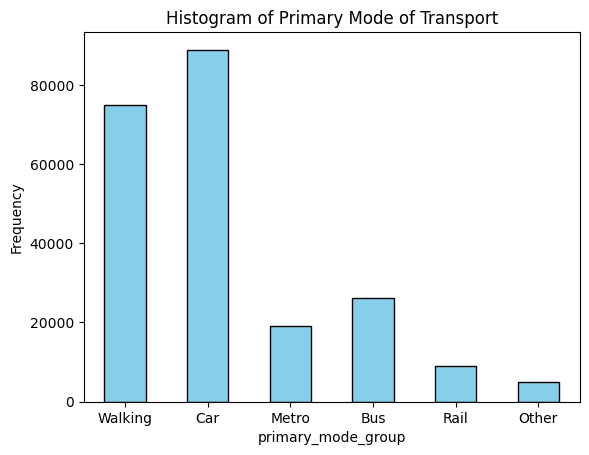

In [79]:
# Sort values to ensure correct bar order (1, 2, 3, 4)
counts = merged_df_final["primary_mode_group"].value_counts().sort_index()

# Plot bar chart
counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Custom labels
activity_labels = ["Walking", "Car", "Metro", "Bus", "Rail", "Other"]
plt.xticks(ticks=range(len(activity_labels)), labels=activity_labels, rotation=0)

# Axis labels and title
plt.ylabel("Frequency")
plt.title("Histogram of Primary Mode of Transport")

# Show plot
plt.show()

In [73]:
# Define the conditions
conditions = [
    merged_df_final["main_activity"].isin([1, 2]),      # employed = 1
    merged_df_final["main_activity"].isin([3]),     # retired = 2
    merged_df_final["main_activity"].isin([4,5,7, 8, 9]),       # unemployed = 3
    merged_df_final["main_activity"].isin([6]), # student = 4
]

# Define the values for each condition
choices = [1, 2, 3, 4]

# Create new column
merged_df_final["main_activity_group"] = np.select(conditions, choices, default=5)

# View result
print(merged_df_final[["primary_mode", "main_activity_group"]].head())

   main_activity  main_activity_group
0              1                    1
1              1                    1
2              1                    1
3              1                    1
4              4                    3


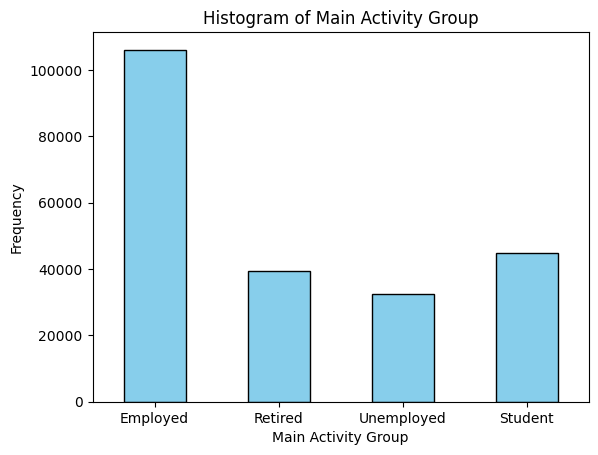

In [88]:
# Sort values to ensure correct bar order (1, 2, 3, 4)
counts = merged_df_final["main_activity_group"].value_counts().sort_index()

# Plot bar chart
counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Custom labels
activity_labels = ["Employed", "Retired", "Unemployed", "Student"]
plt.xticks(ticks=range(len(activity_labels)), labels=activity_labels, rotation=0)

# Axis labels and title
plt.xlabel("Main Activity Group")
plt.ylabel("Frequency")
plt.title("Histogram of Main Activity Group")

# Show plot
plt.show()

In [82]:
###prof_status
# Define the conditions
conditions = [
    merged_df_final["prof_status"].isin([1]),      # public = 1
    merged_df_final["prof_status"].isin([2]),     # private = 2
    merged_df_final["prof_status"].isin([3, 4]),       # business = 3
    merged_df_final["prof_status"].isin([5]), # other = 4
]

# Define the values for each condition
choices = [1, 2, 3, 4]

# Create new column
merged_df_final["prof_status_group"] = np.select(conditions, choices, default=5)

# View result
print(merged_df_final[["prof_status", "prof_status_group"]].head())

   prof_status  prof_status_group
0          2.0                  2
1          2.0                  2
2          2.0                  2
3          2.0                  2
4          NaN                  5


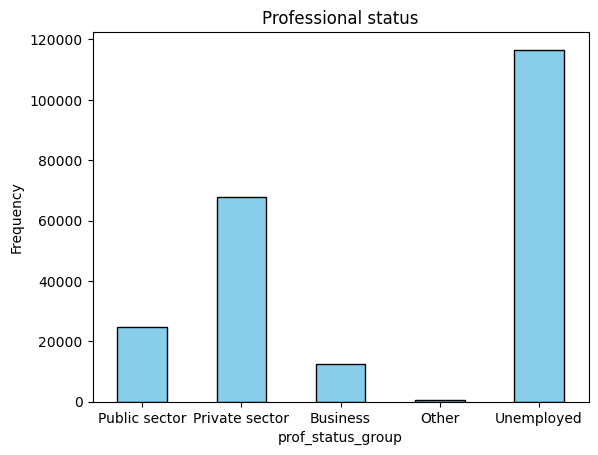

In [95]:
counts = merged_df_final["prof_status_group"].value_counts().sort_index()

# Plot bar chart
counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Custom labels
activity_labels = ["Public sector", "Private sector", "Business", "Other", "Unemployed"]
plt.xticks(ticks=range(len(activity_labels)), labels=activity_labels, rotation=0)

# Axis labels and title
plt.ylabel("Frequency")
plt.title("Professional status")

# Show plot
plt.show()

In [92]:
count = merged_df_final[
    (merged_df_final["main_activity_group"] != 1) &
    (merged_df_final["prof_status_group"] == 5)
].shape[0]

print("Number of matching rows:", count)

Number of matching rows: 116656


In [93]:
count = merged_df_final[
    (merged_df_final["main_activity_group"] != 1) &
    (merged_df_final["prof_status_group"] != 5)
].shape[0]

print("Number of matching rows:", count)

Number of matching rows: 0


In [94]:
merged_df_final["prof_status"].isna().sum()

np.int64(116656)

In [96]:
count = merged_df_final[
    (merged_df_final["madrid_community"] != 1) 
].shape[0]

print("Number of matching rows:", count)

Number of matching rows: 1827


In [98]:
### DROP MADRID_COMMUNITY
merged_df_final.drop(columns="madrid_community", inplace=True)


In [97]:
### DONT DROP SPANISH
count = merged_df_final[
    (merged_df_final["spanish"] != 1) 
].shape[0]

print("Number of matching rows:", count)

Number of matching rows: 10563


In [122]:
#### DRIVING LICENSE
# Define the conditions
conditions = [
    merged_df_final["driving_license"].isin([1]),      # no license = 0
    merged_df_final["driving_license"].isin([2,3,4,5]),      # license = 1
]

# Define the values for each condition
choices = [0,1]

# Create new column
merged_df_final["driving_license_binary"] = np.select(conditions, choices, default=3)

# View result
print(merged_df_final[["driving_license", "driving_license_binary"]].head())

   driving_license  driving_license_binary
0                4                       1
1                4                       1
2                4                       1
3                4                       1
4                1                       0


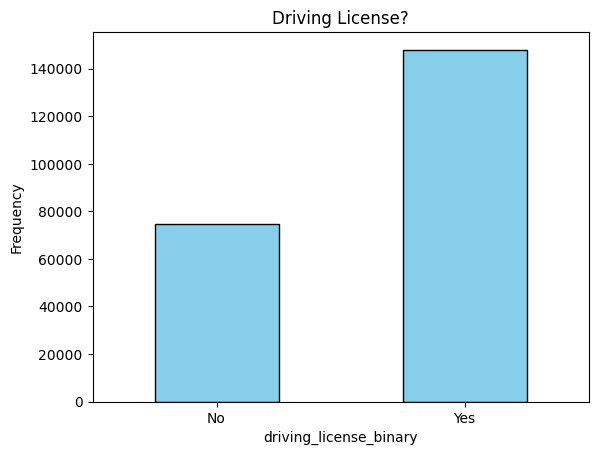

In [104]:
# Sort values to ensure correct bar order 
counts = merged_df_final["driving_license_binary"].value_counts().sort_index()

# Plot bar chart
counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Custom labels
activity_labels = ["No", "Yes"]
plt.xticks(ticks=range(len(activity_labels)), labels=activity_labels, rotation=0)

# Axis labels and title
plt.ylabel("Frequency")
plt.title("Driving License?")

# Show plot
plt.show()

In [107]:
#### DRIVING LICENSE
# Define the conditions
conditions = [
    merged_df_final["educ"].isin([1,2]),      # Primary education or less
    merged_df_final["educ"].isin([3,4]),      # Secondary education 
    merged_df_final["educ"].isin([7]),      # bachelors and higher 
    merged_df_final["educ"].isin([5,6]),    #others
    
]

# Define the values for each condition
choices = [1,2,3,4]

# Create new column
merged_df_final["educ_group"] = np.select(conditions, choices, default=5)

# View result
print(merged_df_final[["educ", "educ_group"]].head())

   educ  educ_group
0     4           2
1     4           2
2     4           2
3     4           2
4     3           2


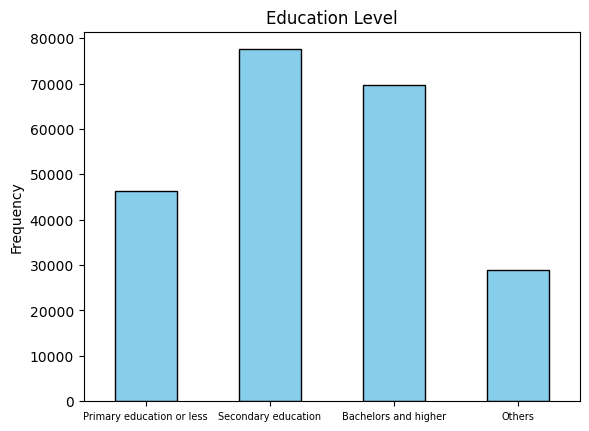

In [114]:
# Sort values to ensure correct bar order 
counts = merged_df_final["educ_group"].value_counts().sort_index()

# Plot bar chart
counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Custom labels
bar_labels = ["Primary education or less", "Secondary education", "Bachelors and higher", "Others"]
plt.xticks(ticks=range(len(bar_labels)), labels=bar_labels, rotation=0, fontsize=7)  # 👈 Set font size here

# Axis labels and title
plt.ylabel("Frequency")
plt.title("Education Level")
plt.xlabel("")
# Show plot
plt.show()

In [123]:
merged_df_final.columns

Index(['hh_id', 'ind_id', 'trip_id', 'origin', 'start_time', 'destination',
       'arrival_time', 'travel_freq', 'pv_for_trip?', 'why_not_pv',
       'why_not_public_t', 'n_stages_per_trip', 'primary_reason',
       'distance_km', 'primary_mode', 'sex', 'Age', 'spanish',
       'driving_license', 'educ', 'main_activity', 'prof_status',
       'transport_card', 'loaded?', 'Reference Day', 'Reference Month',
       'Reference Year', 'mobility_issue', 'municip_code', 'municip_name',
       'province_code', 'province_name', 'ppl_hh', 'pp_4age_hh', 'vehicles_hh',
       'V1B11TIPO', 'V1B12CARB', 'V1B13EST', 'V2B11TIPO1', 'V2B12CARB1',
       'V2B13EST1', 'V3B11TIPO1', 'V3B12CARB1', 'V3B13EST1', 'V4B11TIPO1',
       'V4B12CARB1', 'V4B13EST1', 'V5B11TIPO1', 'V5B12CARB1', 'V5B13EST1',
       'memebers_hh', 'trips_hh', 'primary_mode_group', 'main_activity_group',
       'prof_status_group', 'driving_license_binary', 'educ_group',
       'transport_card_binary', 'age_group'],
      dtype='objec

In [121]:
#### Transport Card
# Define the conditions
conditions = [
    merged_df_final["transport_card"].isin([1,2,3]),      # Yes = 1 
    merged_df_final["transport_card"].isin([4]),      # No = 0
]

# Define the values for each condition
choices = [1,0]

# Create new column
merged_df_final["transport_card_binary"] = np.select(conditions, choices, default=3)

# View result
print(merged_df_final[["transport_card", "transport_card_binary"]].head())

   transport_card  transport_card_binary
0               4                      0
1               4                      0
2               4                      0
3               4                      0
4               1                      1


In [119]:
###AGE INTO GROUPS
# Define the conditions
conditions = [
    merged_df_final["Age"] < 18,
    (merged_df_final["Age"] >= 18) & (merged_df_final["Age"] < 30),
    (merged_df_final["Age"] >= 30) & (merged_df_final["Age"] < 60),
    merged_df_final["Age"] >= 60
]

# Define the group values for each condition
values = [1, 2, 3, 4]

# Create the new column
merged_df_final["age_group"] = np.select(conditions, values)

# Check result
print(merged_df_final[["Age", "age_group"]].head())


   Age  age_group
0   28          2
1   28          2
2   36          3
3   36          3
4   35          3


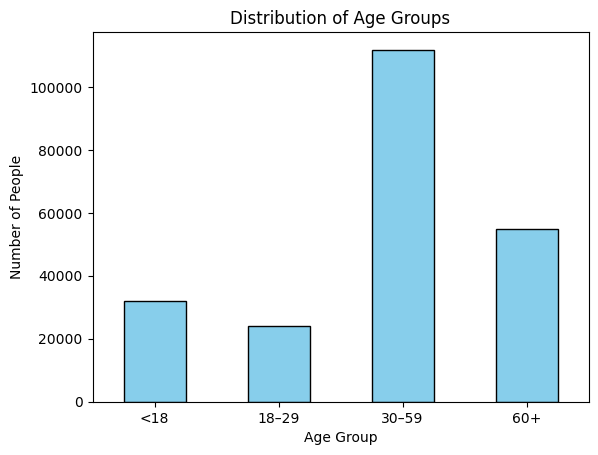

In [120]:
# Count age groups 
age_counts = merged_df_final["age_group"].value_counts().sort_index()

# Plot
age_counts.plot(kind="bar", color="skyblue", edgecolor="black")

# Custom x-axis labels
group_labels = ["<18", "18–29", "30–59", "60+"]
plt.xticks(ticks=range(len(group_labels)), labels=group_labels, rotation=0, fontsize=10)

# Labels & title
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.title("Distribution of Age Groups")

# Show plot
plt.show()


In [124]:
### HH specific data

In [125]:
count = merged_df_final[
    (merged_df_final["province_name"] != "MADRID") 
].shape[0]

print("Number of matching rows:", count)

Number of matching rows: 0


In [126]:
### DROP PROVINCE NAME AND PROVINCE CODE
merged_df_final.drop(columns=["province_name", "province_code"], inplace=True)

In [128]:
### DROP ppl_hh
merged_df_final.drop(columns=["ppl_hh"], inplace=True)

In [129]:
merged_df_final.columns

Index(['hh_id', 'ind_id', 'trip_id', 'origin', 'start_time', 'destination',
       'arrival_time', 'travel_freq', 'pv_for_trip?', 'why_not_pv',
       'why_not_public_t', 'n_stages_per_trip', 'primary_reason',
       'distance_km', 'primary_mode', 'sex', 'Age', 'spanish',
       'driving_license', 'educ', 'main_activity', 'prof_status',
       'transport_card', 'loaded?', 'Reference Day', 'Reference Month',
       'Reference Year', 'mobility_issue', 'municip_code', 'municip_name',
       'pp_4age_hh', 'vehicles_hh', 'V1B11TIPO', 'V1B12CARB', 'V1B13EST',
       'V2B11TIPO1', 'V2B12CARB1', 'V2B13EST1', 'V3B11TIPO1', 'V3B12CARB1',
       'V3B13EST1', 'V4B11TIPO1', 'V4B12CARB1', 'V4B13EST1', 'V5B11TIPO1',
       'V5B12CARB1', 'V5B13EST1', 'memebers_hh', 'trips_hh',
       'primary_mode_group', 'main_activity_group', 'prof_status_group',
       'driving_license_binary', 'educ_group', 'transport_card_binary',
       'age_group'],
      dtype='object')

In [ ]:
### dummy for rush hour 

In [130]:
merged_df_final["start_time"] = merged_df_final["start_time"].astype(int)
merged_df_final["arrival_time"] = merged_df_final["arrival_time"].astype(int)

In [ ]:
#Define the Rush Hour Windows
#Morning: 0800–0930
#Midday: 1330–1500
#Evening: 1700–1900

In [131]:
merged_df_final["rush_hour"] = merged_df_final["start_time"].apply(
    lambda x: 1 if (
        (800 <= x <= 930) or 
        (1330 <= x <= 1500) or 
        (1700 <= x <= 1900)
    ) else 0
)

In [133]:
print(merged_df_final[["start_time", "rush_hour"]].tail())


        start_time  rush_hour
222739        1243          0
222740        1530          0
222741        1700          1
222742        1930          0
222743        2300          0


In [134]:
merged_df_final.columns

Index(['hh_id', 'ind_id', 'trip_id', 'origin', 'start_time', 'destination',
       'arrival_time', 'travel_freq', 'pv_for_trip?', 'why_not_pv',
       'why_not_public_t', 'n_stages_per_trip', 'primary_reason',
       'distance_km', 'primary_mode', 'sex', 'Age', 'spanish',
       'driving_license', 'educ', 'main_activity', 'prof_status',
       'transport_card', 'loaded?', 'Reference Day', 'Reference Month',
       'Reference Year', 'mobility_issue', 'municip_code', 'municip_name',
       'pp_4age_hh', 'vehicles_hh', 'V1B11TIPO', 'V1B12CARB', 'V1B13EST',
       'V2B11TIPO1', 'V2B12CARB1', 'V2B13EST1', 'V3B11TIPO1', 'V3B12CARB1',
       'V3B13EST1', 'V4B11TIPO1', 'V4B12CARB1', 'V4B13EST1', 'V5B11TIPO1',
       'V5B12CARB1', 'V5B13EST1', 'memebers_hh', 'trips_hh',
       'primary_mode_group', 'main_activity_group', 'prof_status_group',
       'driving_license_binary', 'educ_group', 'transport_card_binary',
       'age_group', 'rush_hour'],
      dtype='object')

In [137]:
print(merged_df_final[["pv_for_trip?"]].head())

   pv_for_trip?
0           1.0
1           1.0
2           1.0
3           1.0
4           2.0


In [138]:
### DOES HH have an electric vehicle
cols = ["V1B12CARB", "V2B12CARB1", "V3B12CARB1", "V4B12CARB1", "V5B12CARB1"]

# Create a new column where 1 if any of the 5 columns have value 1 or 2, else 0
merged_df_final["electric?"] = merged_df_final[cols].apply(
    lambda row: 1 if any(val in [1, 2] for val in row if pd.notnull(val)) else 0, axis=1
)

In [140]:
print(merged_df_final[["electric?"]].tail())

        electric?
222739          1
222740          1
222741          1
222742          1
222743          1


In [142]:
### PRIVATE PARKING???
cols_parking = ["V1B13EST", "V2B13EST1", "V3B13EST1", "V4B13EST1", "V5B13EST1"]
# 3, 4, 5 has a private parking = 1  
# Create the new column
merged_df_final["private_parking?"] = merged_df_final[cols_parking].apply(
    lambda row: 1 if any(val in [3, 4, 5] for val in row if pd.notnull(val)) else 0,
    axis=1
)

In [144]:
print(merged_df_final[["private_parking?"]].head())

   private_parking?
0                 1
1                 1
2                 1
3                 1
4                 1


In [145]:
merged_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222744 entries, 0 to 222743
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   hh_id                   222744 non-null  int64  
 1   ind_id                  222744 non-null  int64  
 2   trip_id                 222744 non-null  int64  
 3   origin                  222744 non-null  int64  
 4   start_time              222744 non-null  int32  
 5   destination             222744 non-null  int64  
 6   arrival_time            222744 non-null  int32  
 7   travel_freq             222744 non-null  int64  
 8   pv_for_trip?            222741 non-null  float64
 9   why_not_pv              105803 non-null  float64
 10  why_not_public_t        167688 non-null  float64
 11  n_stages_per_trip       222744 non-null  int64  
 12  primary_reason          222744 non-null  int64  
 13  distance_km             222744 non-null  float64
 14  primary_mode        

In [146]:
# Save to CSV
file_path = "transformed_df.csv"  # Change filename as needed
merged_df_final.to_csv(file_path, index=False)